In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('energydata.csv')
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

In [3]:
column_names = {'X1':'Appliance','X2':'T2','X3':'T6'}

In [4]:
df = df.rename(columns=column_names)

In [5]:
simple_linear_reg_df = df[['T2', 'T6']]

In [6]:
print(simple_linear_reg_df)

              T2         T6
0      19.200000   7.026667
1      19.200000   6.833333
2      19.200000   6.560000
3      19.200000   6.433333
4      19.200000   6.366667
...          ...        ...
19730  25.890000  24.796667
19731  25.754000  24.196667
19732  25.628571  23.626667
19733  25.414000  22.433333
19734  25.264286  21.026667

[19735 rows x 2 columns]


<AxesSubplot:xlabel='T2', ylabel='T6'>

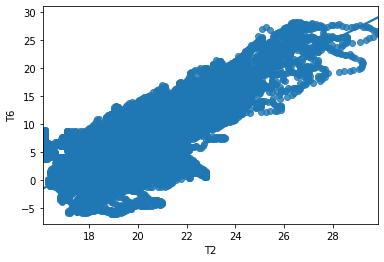

In [7]:
sns.regplot(x="T2", y="T6", data=simple_linear_reg_df)

In [8]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['T6'])
temp6 = normalised_df['T6']

In [9]:
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, temp6, test_size=0.3, random_state=1)


In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [11]:
y_pred = regressor.predict(x_test)

In [12]:
print(y_pred)

[0.27333482 0.4449536  0.59761156 ... 0.35277436 0.46932099 0.39355447]


In [13]:
##### R_Squared #####
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)
round(r2_score, 2)

0.65

In [14]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
round(mae, 2)

0.08

In [15]:
##### Residual sum of square #####
import numpy as np
rss = np.sum(np.square(y_test - y_pred))
round(rss, 2)

65.32

In [16]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
round(rmse, 3)

0.105

In [17]:
df = pd.read_csv('energydata_complete.csv')
# X = df.iloc[:, 1:-1].values
# y = df.iloc[:, -1].values

In [18]:
column_names = {'X1':'Appliances','X2':'lights','X3':'T1','X4':'RH_1','X5':'T2','X6':'RH_2','X7':'T3','X8':'RH_3','X9':'T4',
                'X10':'RH_4','X11':'T5','X12':'RH_5','X13':'RH_6','X14':'T7','X15':'RH_7','X16':'T8','X17':'RH_8',
                'X18':'T9','X19':'RH_9','X20':'T_out','X21':'Press_mm_hg','X22':'RH_out','X23':'Windspeed',
                'X24':'Visibility','X25':'Tdewpoint','X26':'rv1','X27':'rv2','Y1':'T6'    
               }

In [19]:
df = df.rename(columns=column_names)

In [20]:
# y = y.reshape(len(y), 1)

In [21]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['T6'])
temp6 = normalised_df['T6']

In [22]:
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, temp6, test_size=0.3, random_state=1)


In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#fit the model to the training dataset
regressor.fit(x_train, y_train)
#obtain predictions
y_pred = regressor.predict(x_test)

In [24]:
print(y_pred)

[0.25488826 0.54868191 0.55219723 ... 0.32196241 0.56070972 0.3343808 ]


In [25]:
##### Root mean square error  #####
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
round(rmse, 3)

0.03

In [26]:
import pandas as pd
def get_weights_df(model, feat, col_name):   
    #this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

#linear_model_weights = get_weights_df(regressor, x_train, 'Linear_Model_Weight')


In [27]:
linear_model_weights = get_weights_df(regressor, x_train, 'Linear_Model_Weight')

In [28]:
print(linear_model_weights)

       Features  Linear_Model_Weight
0            T1            -0.206695
1     Tdewpoint            -0.095632
2          RH_6            -0.094413
3          RH_3            -0.074757
4            T5            -0.073870
5          RH_1            -0.049003
6          RH_8            -0.043397
7            T8            -0.042557
8            T7            -0.037742
9            T4            -0.029007
10  Press_mm_hg            -0.021986
11         RH_5            -0.002732
12    Windspeed            -0.001706
13   Visibility            -0.000733
14          rv1            -0.000126
15          rv2            -0.000126
16       lights             0.007917
17         RH_7             0.008454
18         RH_9             0.012384
19           T3             0.022226
20   Appliances             0.028512
21         RH_4             0.035104
22           T9             0.085539
23         RH_2             0.116841
24       RH_out             0.146321
25           T2             0.332406
2

In [29]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [30]:
r_pred = ridge_reg.predict(x_test)

In [31]:
print(r_pred)

[0.25397931 0.54954228 0.55406089 ... 0.32412295 0.56091979 0.33484588]


In [32]:
##### Root mean square error  #####
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, r_pred))
round(rmse, 3)

0.03

In [33]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [34]:
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [35]:
print(final_weights)

       Features  Linear_Model_Weight  Ridge_Weight  Lasso_weight
0            T1            -0.206695     -0.197841     -0.000000
1     Tdewpoint            -0.095632     -0.010304      0.040905
2          RH_6            -0.094413     -0.091893     -0.055372
3          RH_3            -0.074757     -0.072964      0.000000
4            T5            -0.073870     -0.069693     -0.000000
5          RH_1            -0.049003     -0.040574      0.000000
6          RH_8            -0.043397     -0.041705      0.000000
7            T8            -0.042557     -0.045178     -0.001069
8            T7            -0.037742     -0.037333     -0.000000
9            T4            -0.029007     -0.029460     -0.000000
10  Press_mm_hg            -0.021986     -0.022910     -0.000000
11         RH_5            -0.002732     -0.003767     -0.000000
12    Windspeed            -0.001706     -0.004357      0.000000
13   Visibility            -0.000733     -0.000253     -0.000000
14          rv1          

In [36]:
l_pred = lasso_reg.predict(x_test)

In [37]:
print(l_pred)

[0.25173691 0.56313624 0.58145966 ... 0.33248688 0.52385532 0.32214455]


In [38]:
##### Root mean square error  #####
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, l_pred))
round(rmse, 3)

0.037